## Araç Sigortası Satış Tahmin Problemi
Araç sahiplerinin araç sigortası satın almak konusundaki niyetlerinin tespiti sigorta şirketleri için büyük önem taşır. Doğru tahminler sigorta şirketleri için bir iletişim stratejisi planlayarak potansiyel müşterilere ulaşma, iş modellerini ve gelirlerini optmize etme fırsatı yaratır.   

Müşterilerine sağlık sigortası sağlayan bir sigorta şirketi bir önceki yılın poliçe sahiplerine araç sigortası satmayı planlamaktadır. Müşterilerin araç sigortası ile ilgilenip ilgilenmediklerini tahmin amacıyla kullanılacak şirket verisi müşterinin demografik bilgilerini (yaş, cinsiyet, bulunduğu il vb), araç özelliklerini (yaş ve hasar durumu) ve poliçe bilgilerini (prim ve kanal bilgileri) içermektedir. 

Aşağıdaki tablo veri setinde kullanılan öznitelikleri (features) ve açıklamalarını içermektedir.

|Öznitelik|Açıklama|
|---------|--------|
|Musteri_no|Anonim müşteri no|
|Cinsiyet|Müşteri cinsiyeti (E/K)|
|Yas|Müşteri doğum yılı|
|Ehliyet|Müşteri ehliyet durumu (Var/Yok)|
|Sehir|Müşterinin bulunduğu il|
|Gecmis_police|Müşterinin halihazırda araç sigortası var mı? (Var/Yok)|
|Arac_yasi|Aracın yaşı (<1 Yıl, 1-2 Yıl, 2-5 Yıl, 5-10 Yıl, >10 Yıl)|
|Hasar_durumu|Müşteri aracında geçmişte hasar oluştu mu? (E/H)|
|Yillik_prm|Yıllık prim bedeli|
|Acenta_no|Satış sorumlusu kod numarası (anonim)|
|Sure|Sigortalı (sağlık sigortası) olma süresi (gün)|
|Sonuc|Müşteri isteği (hedef): ilgileniyor (1), ilgilenmiyor (0)|


### Sizlerden beklenenler:
1. Veriyi ve problemi anlamak üzere hem bağımlı (hedef) hem de bağımsız değişkenler üzerinde bir Keşifsel Veri Analizi  (EDA) yapmanız ve bunları yorumlamanız beklenmektedir. Yorumsuz bırakılan grafikler/plotlar bir anlam taşımadığı gibi değerlendirmeye de alınmayacaktır. Notebook üzerindeki tüm çalışmaların doğru başlıklarla okunabilir ve anlaşılabilir olmasına ve bir düzen içinde sunulmuş olmasına  azami dikkat göstermenizi rica ediyoruz. Bu bölümün notlandırması burada sözü edilen kriterlere dayanacak ve 40 (100 üzerinden) puanlık bir ağırlık taşıyacaktır. 


2. En iyi performans gösteren modelin "test" verisi üzerindeki tahminlerini `.csv` dosyası olarak oluşturmanız ve Kaggle'a yüklemeniz gerekmektedir. Kaggle üzerindeki toplam (private + public) skorunuza stinaden bu bölümün ağırlığı 60 (100 üzerinden) puan olarak belirlenmiştir. 60 puan Kaggle'daki sıralamanıza göre doğrusal bir formülle normalize edilcektir.


### Başarı metriği
Bu hackathon için değerlendirme metriğiniz "**ROC_AUC Score**" olarak belirlenmiştir.





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import fbeta_score, make_scorer
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import time
from sklearn import metrics  
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from lightgbm import LGBMClassifier
from  xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV,RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
sns.set()
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn import model_selection
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import precision_score, recall_score, roc_auc_score, precision_recall_curve
from sklearn.metrics import f1_score, fbeta_score, accuracy_score, classification_report, average_precision_score
from datetime import datetime,timedelta
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
# Import libraries
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as pipe_imb
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.pipeline import Pipeline as pipe_imb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier as RF
import missingno as msno

import sklearn.decomposition as dec

In [ ]:
arac_test = pd.read_excel('Arac_test.xlsx')

arac_train = pd.read_excel('Arac_train.xlsx')
arac_train=arac_train.drop(['Musteri_no'], axis=1)
arac_test=arac_test.drop(['Musteri_no'], axis=1)

In [ ]:
arac_train["Yas"]=2021-arac_train["Yas"]


In [ ]:
arac_test["Yas"]=2021-arac_test["Yas"]

# **EDA**

Sonuc
0    223556
1     31131
dtype: int64


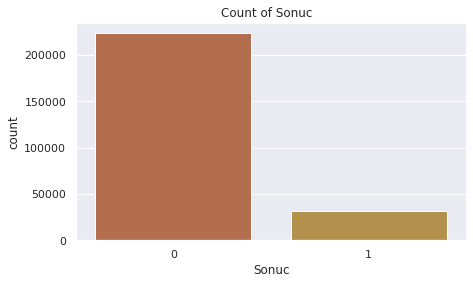

In [ ]:
# ENBALANCED DATA SET
plt.figure(figsize = (7,4))

print(arac_train.groupby('Sonuc').size()) # or (df.Churn == True).value_counts()
sns.countplot(arac_train['Sonuc'],label="Count", palette="autumn",saturation=0.4, capsize=0.2) # Frequency of Sales
plt.title('Count of Sonuc  ')
plt.show()

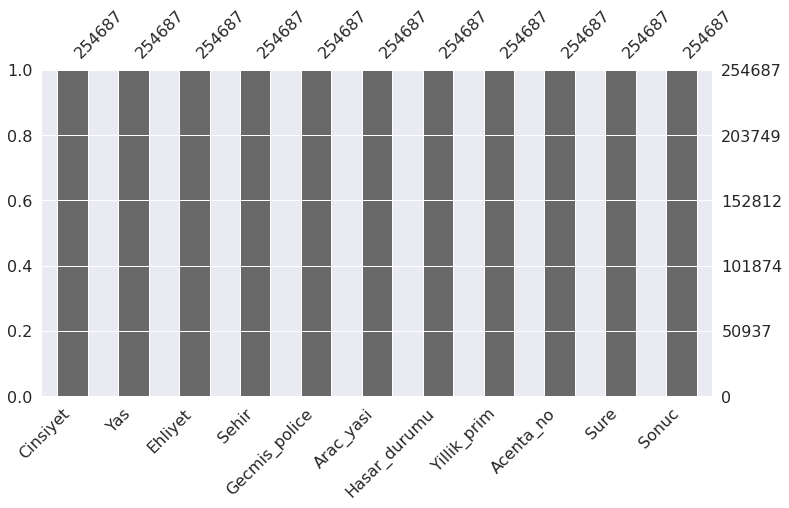

In [ ]:
sns.set()
msno.bar(arac_train, figsize=(12,6));

In [ ]:
arac_train.head(1)

,Cinsiyet,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc
0,E,36,Var,Ordu,Yok,1-2 Yil,E,2960.0,147,131,0


# **CİNSİYETT**

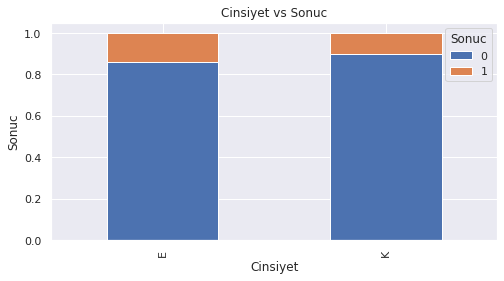

In [ ]:
table=pd.crosstab(arac_train.Cinsiyet, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,4), stacked=True)
plt.title('Cinsiyet vs Sonuc')
plt.xlabel('Cinsiyet')
plt.ylabel('Sonuc')
plt.show()

In [ ]:
cols_to_transform = ['Cinsiyet'] # make a list if more than one column
arac_train = pd.get_dummies(arac_train, columns = cols_to_transform,drop_first=True)

In [ ]:
cols_to_transform = ['Cinsiyet'] # make a list if more than one column
arac_test = pd.get_dummies(arac_test, columns = cols_to_transform,drop_first=True)

In [ ]:
arac_train.head()

,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K
0,36,Var,Ordu,Yok,1-2 Yil,E,2960.00,147,131,0,0
1,31,Var,Gaziantep,Var,< 1 Yil,H,3081.78,177,213,0,0
2,31,Var,Kocaeli,Yok,< 1 Yil,E,3672.67,177,72,0,0
3,26,Var,Izmir,Var,< 1 Yil,H,3599.89,177,117,0,0
4,23,Var,Kocaeli,Yok,< 1 Yil,E,3697.22,177,177,0,0


# **Yas**

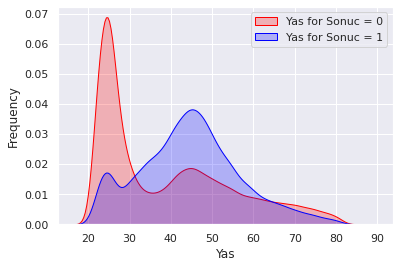

In [ ]:
g = sns.kdeplot(arac_train['Yas'][(arac_train["Sonuc"] == 0)], color="Red", shade = True)
g = sns.kdeplot(arac_train['Yas'][(arac_train["Sonuc"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('Yas')
g.set_ylabel("Frequency")
g = g.legend(["Yas for Sonuc = 0", "Yas for Sonuc = 1"])

In [ ]:
arac_train['Yas'].max()

86

In [ ]:
arac_train['Yas'].min()

21

In [ ]:
bins = [20,30,40,50,60,100]
labels=["young","middle","middle_p","older","older_p"]
arac_train['age_bin'] = pd.cut(arac_train['Yas'], bins=bins, labels=labels)
arac_train.head()

,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,age_bin
0,36,Var,Ordu,Yok,1-2 Yil,E,2960.00,147,131,0,0,middle
1,31,Var,Gaziantep,Var,< 1 Yil,H,3081.78,177,213,0,0,middle
2,31,Var,Kocaeli,Yok,< 1 Yil,E,3672.67,177,72,0,0,middle
3,26,Var,Izmir,Var,< 1 Yil,H,3599.89,177,117,0,0,young
4,23,Var,Kocaeli,Yok,< 1 Yil,E,3697.22,177,177,0,0,young


In [ ]:
bins = [20,30,40,50,60,100]
labels=["young","middle","middle_p","older","older_p"]
arac_test['age_bin'] = pd.cut(arac_test['Yas'], bins=bins, labels=labels)
arac_test.head()

,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin
0,26,Var,Kocaeli,Yok,< 1 Yil,H,2975.56,177,94,1,young
1,24,Var,Mersin,Var,< 1 Yil,H,2683.33,177,105,1,young
2,43,Var,Samsun,Yok,1-2 Yil,E,3982.78,149,76,0,middle_p
3,26,Var,Antalya,Yok,1-2 Yil,E,2716.67,179,193,1,young
4,22,Var,Bursa,Var,< 1 Yil,H,3301.89,185,224,1,young


In [ ]:
arac_train['age_bin'].unique()

['middle', 'young', 'middle_p', 'older_p', 'older']
Categories (5, object): ['young' < 'middle' < 'middle_p' < 'older' < 'older_p']

In [ ]:
arac_test['age_bin'].unique()

['young', 'middle_p', 'middle', 'older', 'older_p']
Categories (5, object): ['young' < 'middle' < 'middle_p' < 'older' < 'older_p']

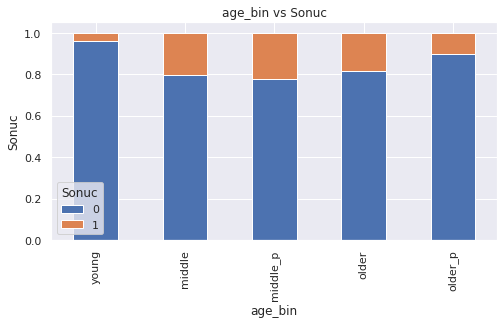

In [ ]:
table=pd.crosstab(arac_train.age_bin, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(8,4), stacked=True)
plt.title('age_bin vs Sonuc')
plt.xlabel('age_bin')
plt.ylabel('Sonuc')
plt.show()

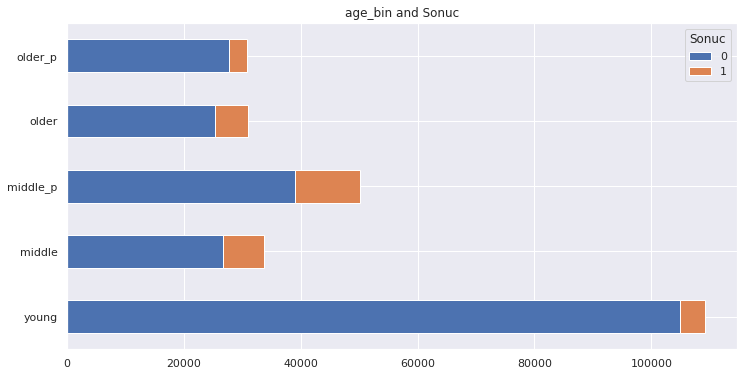

In [ ]:
arac_train['NUMBER'] = 1 
pivot_table = pd.pivot_table(arac_train,values = 'NUMBER',index=['age_bin'],columns=['Sonuc'], aggfunc=np.sum,fill_value=0).rename_axis(None)
pivot_table = pivot_table[[0,1]]
pivot_table.plot(kind='barh', stacked=True,figsize=(12,6), title= 'age_bin and Sonuc', rot=0)

Yaşa göre farklılaştığını gördüğüm için binlere ayırdım yaşı. büyük çogunlugu datanın young(20-30) arasından gelıyor.40-50 yaş middle_p diğerlerinden farklılaşıyor

In [ ]:
PythonDummies = arac_train['age_bin'].str.get_dummies(sep=",")
Satisfaction=arac_train["Sonuc"]

chi2test = SelectKBest(score_func=chi2, k='all') # you can select the first n features as well (k=n)
selector = chi2test.fit(PythonDummies, Satisfaction)

# summarize scores
np.set_printoptions(precision=3)
print('Scores  :', selector.scores_, '\n')
print('p_values:', selector.pvalues_, '\n')
features = selector.transform(PythonDummies)

print(PythonDummies.columns[selector.get_support()])

dfChi2 = pd.DataFrame(data=np.zeros(shape=(PythonDummies.shape[1],2)), columns = ['Feature', 'p-value'])
for i in range(PythonDummies.shape[1]):
    dfChi2.loc[i,'Feature'] = PythonDummies.columns[i]
    dfChi2.loc[i, 'p-value'] = np.round(selector.pvalues_[i],6)
dfChi2.sort_values(by='p-value')

Scores  : [2199.591 4659.778 1117.426  123.466 7089.717] 

p_values: [0.000e+000 0.000e+000 5.389e-245 1.103e-028 0.000e+000] 

Index(['middle', 'middle_p', 'older', 'older_p', 'young'], dtype='object')


,Feature,p-value
0,middle,0.0
1,middle_p,0.0
2,older,0.0
3,older_p,0.0
4,young,0.0


In [ ]:
cols_to_transform = ['age_bin'] # make a list if more than one column
arac_train = pd.get_dummies(arac_train, columns = cols_to_transform,drop_first=True)
arac_train.head()

,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,NUMBER,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p
0,36,Var,Ordu,Yok,1-2 Yil,E,2960.00,147,131,0,0,1,1,0,0,0
1,31,Var,Gaziantep,Var,< 1 Yil,H,3081.78,177,213,0,0,1,1,0,0,0
2,31,Var,Kocaeli,Yok,< 1 Yil,E,3672.67,177,72,0,0,1,1,0,0,0
3,26,Var,Izmir,Var,< 1 Yil,H,3599.89,177,117,0,0,1,0,0,0,0
4,23,Var,Kocaeli,Yok,< 1 Yil,E,3697.22,177,177,0,0,1,0,0,0,0


In [ ]:
cols_to_transform = ['age_bin'] # make a list if more than one column
arac_test= pd.get_dummies(arac_test, columns = cols_to_transform,drop_first=True)
arac_test.head()

,Yas,Ehliyet,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p
0,26,Var,Kocaeli,Yok,< 1 Yil,H,2975.56,177,94,1,0,0,0,0
1,24,Var,Mersin,Var,< 1 Yil,H,2683.33,177,105,1,0,0,0,0
2,43,Var,Samsun,Yok,1-2 Yil,E,3982.78,149,76,0,0,1,0,0
3,26,Var,Antalya,Yok,1-2 Yil,E,2716.67,179,193,1,0,0,0,0
4,22,Var,Bursa,Var,< 1 Yil,H,3301.89,185,224,1,0,0,0,0


# **Ehliyet**

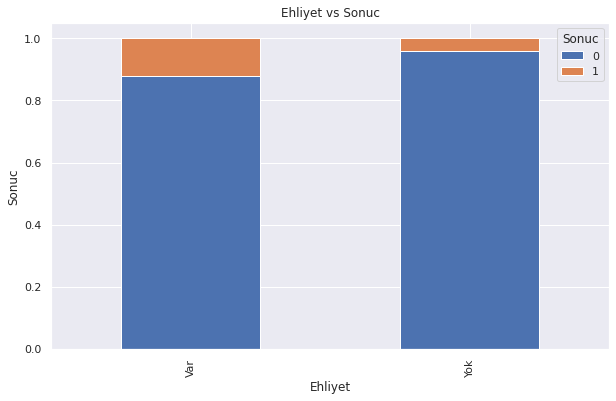

In [ ]:
table=pd.crosstab(arac_train.Ehliyet, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Ehliyet vs Sonuc')
plt.xlabel('Ehliyet')
plt.ylabel('Sonuc')
plt.show()

In [ ]:
cols_to_transform = ['Ehliyet'] # make a list if more than one column
arac_train = pd.get_dummies(arac_train, columns = cols_to_transform,drop_first=True)
cols_to_transform = ['Ehliyet'] # make a list if more than one column
arac_test = pd.get_dummies(arac_test, columns = cols_to_transform,drop_first=True)

In [ ]:
arac_train.head(2)

,Yas,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,NUMBER,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok
0,36,Ordu,Yok,1-2 Yil,E,2960.00,147,131,0,0,1,1,0,0,0,0
1,31,Gaziantep,Var,< 1 Yil,H,3081.78,177,213,0,0,1,1,0,0,0,0


In [ ]:
arac_test.head(2)

,Yas,Sehir,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok
0,26,Kocaeli,Yok,< 1 Yil,H,2975.56,177,94,1,0,0,0,0,0
1,24,Mersin,Var,< 1 Yil,H,2683.33,177,105,1,0,0,0,0,0


# **SEHIR**

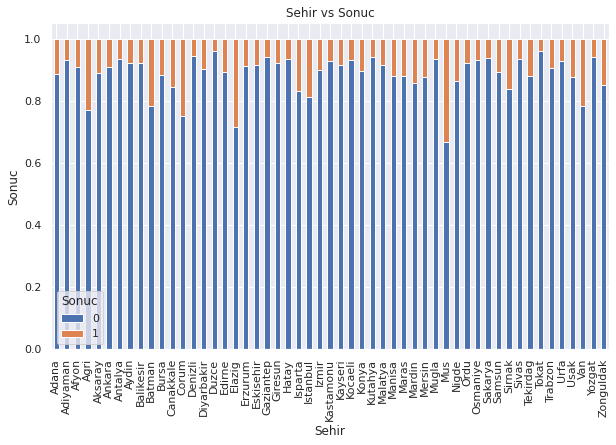

In [ ]:
table=pd.crosstab(arac_train.Sehir, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Sehir vs Sonuc')
plt.xlabel('Sehir')
plt.ylabel('Sonuc')
plt.show()

In [ ]:
PythonDummies = arac_train['Sehir'].str.get_dummies(sep=",")
Satisfaction=arac_train["Sonuc"]

chi2test = SelectKBest(score_func=chi2, k='all') # you can select the first n features as well (k=n)
selector = chi2test.fit(PythonDummies, Satisfaction)

# summarize scores
np.set_printoptions(precision=3)
print('Scores  :', selector.scores_, '\n')
print('p_values:', selector.pvalues_, '\n')
features = selector.transform(PythonDummies)

print(PythonDummies.columns[selector.get_support()])

dfChi2 = pd.DataFrame(data=np.zeros(shape=(PythonDummies.shape[1],2)), columns = ['Feature', 'p-value'])
for i in range(PythonDummies.shape[1]):
    dfChi2.loc[i,'Feature'] = PythonDummies.columns[i]
    dfChi2.loc[i, 'p-value'] = np.round(selector.pvalues_[i],6)
dfChi2.sort_values(by='p-value')

Scores  : [6.253e+00 4.859e+01 1.308e+01 5.709e+00 1.173e+00 2.198e+02 2.381e+02
 5.794e+01 7.147e+01 9.515e+01 4.314e+00 1.208e+01 7.912e+00 1.262e+02
 2.689e+01 3.181e+01 1.797e+00 1.918e+01 2.005e+01 3.407e+01 2.676e+02
 1.940e+01 1.331e+02 1.949e+01 3.246e+03 6.261e+01 7.942e+00 7.102e+01
 2.366e+02 1.797e+01 4.736e+01 2.995e+01 2.167e-01 1.778e-01 7.257e+00
 1.094e-01 8.309e+01 1.121e+01 1.890e-01 3.108e+01 3.072e+01 9.338e+01
 7.472e+00 1.531e+01 5.011e+01 1.952e-01 1.057e+02 1.506e+01 1.385e+02
 2.783e-04 9.439e+00 3.240e+01 1.145e+01] 

p_values: [1.240e-02 3.148e-12 2.980e-04 1.687e-02 2.788e-01 9.984e-50 1.023e-53
 2.704e-14 2.815e-17 1.764e-22 3.781e-02 5.090e-04 4.911e-03 2.825e-29
 2.149e-07 1.701e-08 1.801e-01 1.189e-05 7.561e-06 5.317e-09 3.691e-60
 1.062e-05 8.599e-31 1.012e-05 0.000e+00 2.523e-15 4.830e-03 3.535e-17
 2.189e-53 2.246e-05 5.898e-12 4.422e-08 6.415e-01 6.733e-01 7.061e-03
 7.409e-01 7.827e-20 8.116e-04 6.638e-01 2.473e-08 2.978e-08 4.320e-22
 6.265e-03 9.

,Feature,p-value
40,Osmaniye,0.000000
51,Yozgat,0.000000
22,Hatay,0.000000
27,Kayseri,0.000000
20,Gaziantep,0.000000
19,Eskisehir,0.000000
36,Mugla,0.000000
41,Sakarya,0.000000
44,Sivas,0.000000
15,Duzce,0.000000


In [ ]:
cols_to_transform = ['Sehir'] # make a list if more than one column
arac_train = pd.get_dummies(arac_train, columns = cols_to_transform)

In [ ]:
cols_to_transform = ['Sehir'] # make a list if more than one column
arac_test = pd.get_dummies(arac_test, columns = cols_to_transform)

In [ ]:
arac_train=arac_train.drop(['Sehir_Usak', 'Sehir_Mersin','Sehir_Maras','Sehir_Nigde','Sehir_Tekirdag','Sehir_Manisa','Sehir_Aksaray','Sehir_Edirne','Sehir_Bursa'], axis=1)

In [ ]:
arac_test=arac_test.drop(['Sehir_Usak', 'Sehir_Mersin','Sehir_Maras','Sehir_Nigde','Sehir_Tekirdag','Sehir_Manisa','Sehir_Aksaray','Sehir_Edirne','Sehir_Bursa'], axis=1)

In [ ]:
arac_train.head(1)

,Yas,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,NUMBER,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak
0,36,Yok,1-2 Yil,E,2960.0,147,131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
arac_test.head(1)

,Yas,Gecmis_police,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak
0,26,Yok,< 1 Yil,H,2975.56,177,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Gecmis_police**

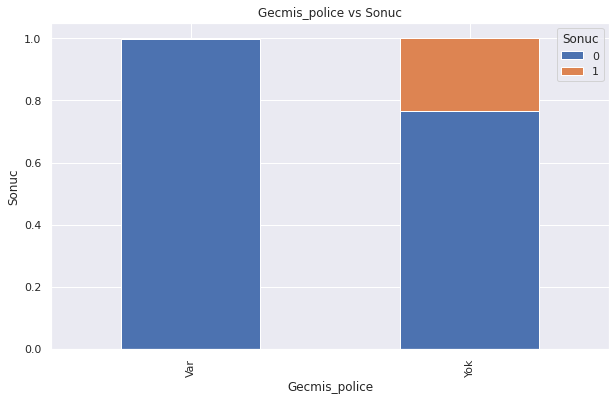

In [ ]:
table=pd.crosstab(arac_train.Gecmis_police, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Gecmis_police vs Sonuc')
plt.xlabel('Gecmis_police')
plt.ylabel('Sonuc')
plt.show()

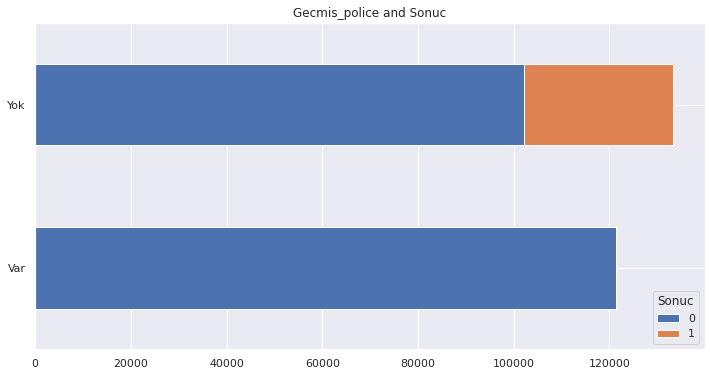

In [ ]:
arac_train['NUMBER'] = 1 
pivot_table = pd.pivot_table(arac_train,values = 'NUMBER',index=['Gecmis_police'],columns=['Sonuc'], aggfunc=np.sum,fill_value=0).rename_axis(None)
pivot_table = pivot_table[[0,1]]
pivot_table.plot(kind='barh', stacked=True,figsize=(12,6), title= 'Gecmis_police and Sonuc', rot=0)

In [ ]:
cols_to_transform = ['Gecmis_police'] # make a list if more than one column
arac_train = pd.get_dummies(arac_train, columns = cols_to_transform,drop_first=True)
arac_train.head(2)

,Yas,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,NUMBER,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok
0,36,1-2 Yil,E,2960.00,147,131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,31,< 1 Yil,H,3081.78,177,213,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
cols_to_transform = ['Gecmis_police'] # make a list if more than one column
arac_test = pd.get_dummies(arac_test, columns = cols_to_transform,drop_first=True)
arac_test.head(2)

,Yas,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok
0,26,< 1 Yil,H,2975.56,177,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,24,< 1 Yil,H,2683.33,177,105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Arac_yasi**

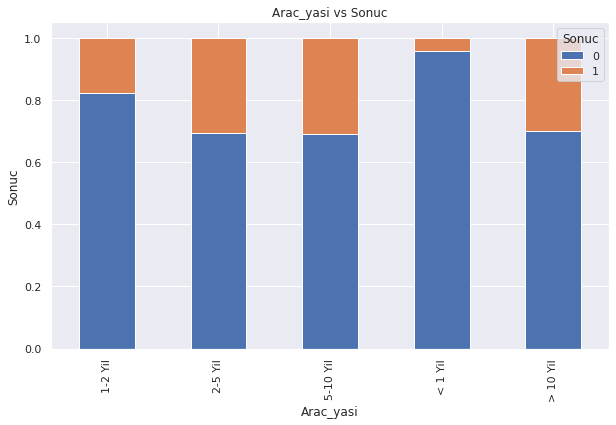

In [ ]:
table=pd.crosstab(arac_train.Arac_yasi, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Arac_yasi vs Sonuc')
plt.xlabel('Arac_yasi')
plt.ylabel('Sonuc')
plt.show()

In [ ]:
arac_train.Arac_yasi.unique()

array(['1-2 Yil', '< 1 Yil', '5-10 Yil', '2-5 Yil', '> 10 Yil'],
      dtype=object)

In [ ]:
PythonDummies = arac_train['Arac_yasi'].str.get_dummies(sep=",")
Satisfaction=arac_train["Sonuc"]

chi2test = SelectKBest(score_func=chi2, k='all') # you can select the first n features as well (k=n)
selector = chi2test.fit(PythonDummies, Satisfaction)

# summarize scores
np.set_printoptions(precision=3)
print('Scores  :', selector.scores_, '\n')
print('p_values:', selector.pvalues_, '\n')
features = selector.transform(PythonDummies)

print(PythonDummies.columns[selector.get_support()])

dfChi2 = pd.DataFrame(data=np.zeros(shape=(PythonDummies.shape[1],2)), columns = ['Feature', 'p-value'])
for i in range(PythonDummies.shape[1]):
    dfChi2.loc[i,'Feature'] = PythonDummies.columns[i]
    dfChi2.loc[i, 'p-value'] = np.round(selector.pvalues_[i],6)
dfChi2.sort_values(by='p-value')

Scores  : [3811.386 1942.291 1312.157 6842.199  171.865] 

p_values: [0.000e+000 0.000e+000 2.579e-287 0.000e+000 2.897e-039] 

Index(['1-2 Yil', '2-5 Yil', '5-10 Yil', '< 1 Yil', '> 10 Yil'], dtype='object')


,Feature,p-value
0,1-2 Yil,0.0
1,2-5 Yil,0.0
2,5-10 Yil,0.0
3,< 1 Yil,0.0
4,> 10 Yil,0.0


In [ ]:
arac_train['Arac_yasi_bin'] = arac_train['Arac_yasi'].map({'< 1 Yil' : 1,'1-2 Yil' : 2, '2-5 Yil' : 3,'5-10 Yil' : 4,'> 10 Yil' : 5})


In [ ]:
arac_test['Arac_yasi_bin'] = arac_test['Arac_yasi'].map({'< 1 Yil' : 1,'1-2 Yil' : 2, '2-5 Yil' : 3,'5-10 Yil' : 4,'> 10 Yil' : 5})

In [ ]:
arac_train.head(2)

,Yas,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,NUMBER,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin
0,36,1-2 Yil,E,2960.00,147,131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2
1,31,< 1 Yil,H,3081.78,177,213,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
arac_test.head(2)

,Yas,Arac_yasi,Hasar_durumu,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin
0,26,< 1 Yil,H,2975.56,177,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,24,< 1 Yil,H,2683.33,177,105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
arac_train=arac_train.drop(['Arac_yasi'], axis=1)
arac_test=arac_test.drop(['Arac_yasi'], axis=1)

# **Hasar_durumu**

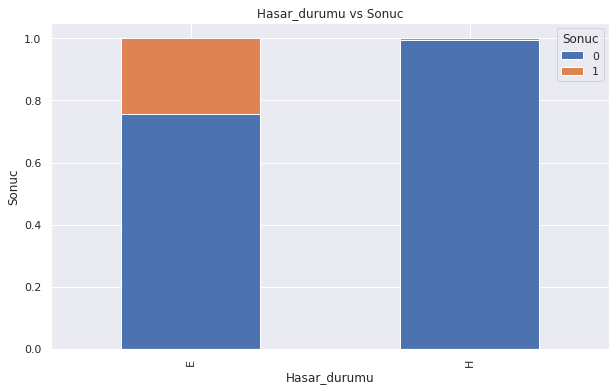

In [ ]:
table=pd.crosstab(arac_train.Hasar_durumu, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Hasar_durumu vs Sonuc')
plt.xlabel('Hasar_durumu')
plt.ylabel('Sonuc')
plt.show()

In [ ]:
cols_to_transform = ['Hasar_durumu'] # make a list if more than one column
arac_test = pd.get_dummies(arac_test, columns = cols_to_transform,drop_first=True)
arac_test.head(2)

,Yas,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin,Hasar_durumu_H
0,26,2975.56,177,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,24,2683.33,177,105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
cols_to_transform = ['Hasar_durumu'] # make a list if more than one column
arac_train = pd.get_dummies(arac_train, columns = cols_to_transform,drop_first=True)
arac_train.head(2)

,Yas,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,NUMBER,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin,Hasar_durumu_H
0,36,2960.00,147,131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0
1,31,3081.78,177,213,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


# **Yillik_prim**

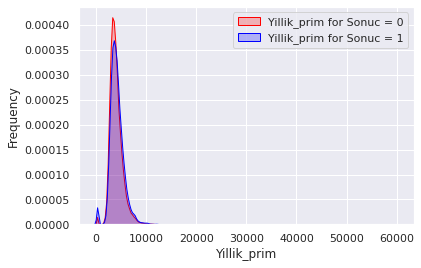

In [ ]:
g = sns.kdeplot(arac_train['Yillik_prim'][(arac_train["Sonuc"] == 0)], color="Red", shade = True)
g = sns.kdeplot(arac_train['Yillik_prim'][(arac_train["Sonuc"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('Yillik_prim')
g.set_ylabel("Frequency")
g = g.legend(["Yillik_prim for Sonuc = 0", "Yillik_prim for Sonuc = 1"])

# **Acenta_no**

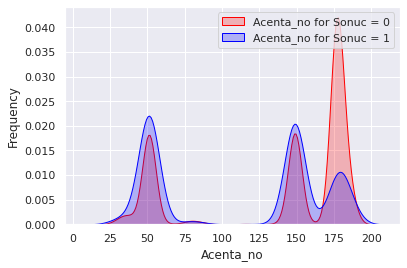

In [ ]:
g = sns.kdeplot(arac_train['Acenta_no'][(arac_train["Sonuc"] == 0)], color="Red", shade = True)
g = sns.kdeplot(arac_train['Acenta_no'][(arac_train["Sonuc"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('Acenta_no')
g.set_ylabel("Frequency")
g = g.legend(["Acenta_no for Sonuc = 0", "Acenta_no for Sonuc = 1"])

In [ ]:
arac_train['Acenta_no'].max()

188

In [ ]:
arac_train['Acenta_no'].min()

26

In [ ]:
bins = [0,20,75,125,160,200]
labels=["a_1","a_2","a_3","a_4","a_5"]
arac_train['Acenta_no_bin'] = pd.cut(arac_train['Acenta_no'], bins=bins, labels=labels)
arac_train.head(2)

,Yas,Yillik_prim,Acenta_no,Sure,Sonuc,Cinsiyet_K,NUMBER,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin,Hasar_durumu_H,Acenta_no_bin
0,36,2960.00,147,131,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,a_4
1,31,3081.78,177,213,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,a_5


 **yukarıdaki grafiğe göre binledim**

In [ ]:
bins = [0,20,75,125,160,200]
labels=["a_1","a_2","a_3","a_4","a_5"]
arac_test['Acenta_no_bin'] = pd.cut(arac_test['Acenta_no'], bins=bins, labels=labels)
arac_test.head(2)

,Yas,Yillik_prim,Acenta_no,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin,Hasar_durumu_H,Acenta_no_bin
0,26,2975.56,177,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,a_5
1,24,2683.33,177,105,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,a_5


In [ ]:
arac_train=arac_train.drop(['Acenta_no'], axis=1)
arac_test=arac_test.drop(['Acenta_no'], axis=1)

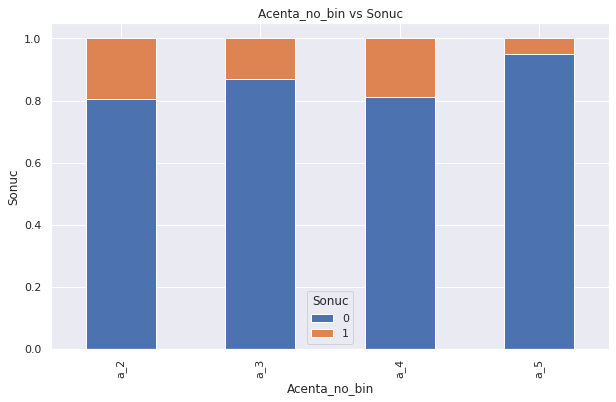

In [ ]:
table=pd.crosstab(arac_train.Acenta_no_bin, arac_train.Sonuc)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', figsize=(10,6), stacked=True)
plt.title('Acenta_no_bin vs Sonuc')
plt.xlabel('Acenta_no_bin')
plt.ylabel('Sonuc')
plt.show()

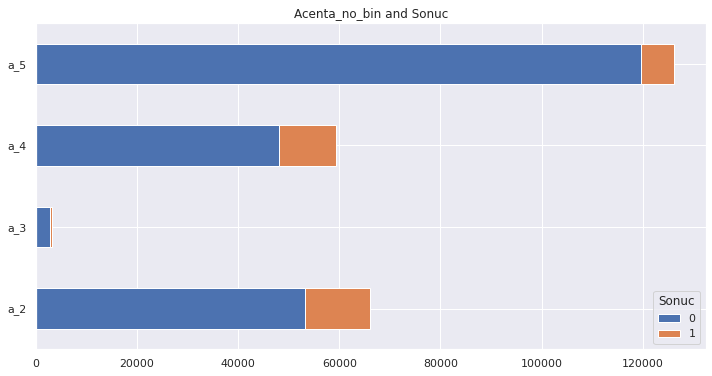

In [ ]:
arac_train['NUMBER'] = 1 
pivot_table = pd.pivot_table(arac_train,values = 'NUMBER',index=['Acenta_no_bin'],columns=['Sonuc'], aggfunc=np.sum,fill_value=0).rename_axis(None)
pivot_table = pivot_table[[0,1]]
pivot_table.plot(kind='barh', stacked=True,figsize=(12,6), title= 'Acenta_no_bin and Sonuc', rot=0)

In [ ]:
PythonDummies = arac_train['Acenta_no_bin'].str.get_dummies(sep=",")
Satisfaction=arac_train["Sonuc"]

chi2test = SelectKBest(score_func=chi2, k='all') # you can select the first n features as well (k=n)
selector = chi2test.fit(PythonDummies, Satisfaction)

# summarize scores
np.set_printoptions(precision=3)
print('Scores  :', selector.scores_, '\n')
print('p_values:', selector.pvalues_, '\n')
features = selector.transform(PythonDummies)

print(PythonDummies.columns[selector.get_support()])

dfChi2 = pd.DataFrame(data=np.zeros(shape=(PythonDummies.shape[1],2)), columns = ['Feature', 'p-value'])
for i in range(PythonDummies.shape[1]):
    dfChi2.loc[i,'Feature'] = PythonDummies.columns[i]
    dfChi2.loc[i, 'p-value'] = np.round(selector.pvalues_[i],6)
dfChi2.sort_values(by='p-value')

Scores  : [3.398e+03 2.115e+00 2.526e+03 5.912e+03] 

p_values: [0.    0.146 0.    0.   ] 

Index(['a_2', 'a_3', 'a_4', 'a_5'], dtype='object')


,Feature,p-value
0,a_2,0.000000
2,a_4,0.000000
3,a_5,0.000000
1,a_3,0.145818


a_3 ün sonuc üzerinde etkisi olmadıgı ıcın bunu drop ettim p valuea 0.05ten büyük

In [ ]:
cols_to_transform = ['Acenta_no_bin'] # make a list if more than one column
arac_train = pd.get_dummies(arac_train, columns = cols_to_transform)

In [ ]:
cols_to_transform = ['Acenta_no_bin'] # make a list if more than one column
arac_test= pd.get_dummies(arac_test, columns = cols_to_transform)

In [ ]:
arac_train=arac_train.drop(['Acenta_no_bin_a_3'], axis=1)
arac_test=arac_test.drop(['Acenta_no_bin_a_3'], axis=1)

In [ ]:
arac_train=arac_train.drop(['NUMBER'], axis=1)

In [ ]:
arac_train.head(1)

,Yas,Yillik_prim,Sure,Sonuc,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin,Hasar_durumu_H,Acenta_no_bin_a_1,Acenta_no_bin_a_2,Acenta_no_bin_a_4,Acenta_no_bin_a_5
0,36,2960.0,131,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,1,0


In [ ]:
arac_test.head(1)

,Yas,Yillik_prim,Sure,Cinsiyet_K,age_bin_middle,age_bin_middle_p,age_bin_older,age_bin_older_p,Ehliyet_Yok,Sehir_Adana,Sehir_Adiyaman,Sehir_Afyon,Sehir_Agri,Sehir_Ankara,Sehir_Antalya,Sehir_Aydin,Sehir_Balikesir,Sehir_Batman,Sehir_Canakkale,Sehir_Corum,Sehir_Denizli,Sehir_Diyarbakir,Sehir_Duzce,Sehir_Elazig,Sehir_Erzurum,Sehir_Eskisehir,Sehir_Gaziantep,Sehir_Giresun,Sehir_Hatay,Sehir_Isparta,Sehir_Istanbul,Sehir_Izmir,Sehir_Kastamonu,Sehir_Kayseri,Sehir_Kocaeli,Sehir_Konya,Sehir_Kutahya,Sehir_Malatya,Sehir_Mardin,Sehir_Mugla,Sehir_Mus,Sehir_Ordu,Sehir_Osmaniye,Sehir_Sakarya,Sehir_Samsun,Sehir_Sirnak,Sehir_Sivas,Sehir_Tokat,Sehir_Trabzon,Sehir_Urfa,Sehir_Van,Sehir_Yozgat,Sehir_Zonguldak,Gecmis_police_Yok,Arac_yasi_bin,Hasar_durumu_H,Acenta_no_bin_a_1,Acenta_no_bin_a_2,Acenta_no_bin_a_4,Acenta_no_bin_a_5
0,26,2975.56,94,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1


# **Sure**

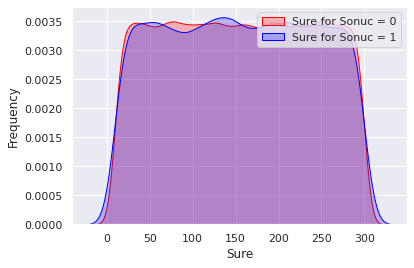

In [ ]:
g = sns.kdeplot(arac_train['Sure'][(arac_train["Sonuc"] == 0)], color="Red", shade = True)
g = sns.kdeplot(arac_train['Sure'][(arac_train["Sonuc"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('Sure')
g.set_ylabel("Frequency")
g = g.legend(["Sure for Sonuc = 0", "Sure for Sonuc = 1"])

# **MODELLİNG**

In [ ]:
arac_train.isna().sum()

Yas                  0
Yillik_prim          0
Sure                 0
Sonuc                0
Cinsiyet_K           0
                    ..
Hasar_durumu_H       0
Acenta_no_bin_a_1    0
Acenta_no_bin_a_2    0
Acenta_no_bin_a_4    0
Acenta_no_bin_a_5    0
Length: 61, dtype: int64

In [ ]:
y = arac_train.Sonuc
X = arac_train.drop('Sonuc', axis=1) #drop column "Price" from the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
seed = 42

**DEFAULT TREE BASED MODEL**

In [ ]:
seed = 10
tree = DecisionTreeClassifier(random_state=seed)
models = [
    ['DecisionTree', DecisionTreeClassifier(random_state=seed)], 
    ['RandomForest', RandomForestClassifier(n_estimators=100, random_state=seed)], #default changes to 100 in sklearn 0.22
    ['ExtraTrees', ExtraTreesClassifier(n_estimators=100, random_state=seed)],
    ['BaggingClassifier', BaggingClassifier(base_estimator=tree, n_estimators=100, random_state=seed)],
    ['AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=seed)], 
    ['GradientBoosting', GradientBoostingClassifier(random_state=seed)],
    ['XGBoost', XGBClassifier(seed=seed)],
    ]

In [ ]:
# Use the following classifiers with their defaults

log_cols=["Classifier", "ROC_AUC Score"]
log_f1 = pd.DataFrame(columns=log_cols)


print("ROC_AUC Score : ")
print("="*30)
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    log_entry = pd.DataFrame([[abbrv, roc_auc_score(y_test, y_pred)*100]], columns=log_cols)
    log_f1 = log_f1.append(log_entry)
    print('%17s  %5.3f' % (abbrv,roc_auc_score(y_test, y_pred)))
    

print("")
print("recall - score : ")
print("="*30)
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%17s  %5.3f' % (abbrv,recall_score(y_test, y_pred)))


print("")
print("precision_score - score : ")
print("="*30)
for abbrv, clf in models:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print('%17s  %5.3f' % (abbrv,precision_score(y_test, y_pred)))
    

ROC_AUC Score : 
     DecisionTree  0.606
     RandomForest  0.558
       ExtraTrees  0.573
BaggingClassifier  0.553
         AdaBoost  0.509
 GradientBoosting  0.505
          XGBoost  0.504

recall - score : 
     DecisionTree  0.314
     RandomForest  0.155
       ExtraTrees  0.201
BaggingClassifier  0.140
         AdaBoost  0.022
 GradientBoosting  0.012
          XGBoost  0.009

precision_score - score : 
     DecisionTree  0.298
     RandomForest  0.362
       ExtraTrees  0.336
BaggingClassifier  0.365
         AdaBoost  0.495
 GradientBoosting  0.594
          XGBoost  0.600


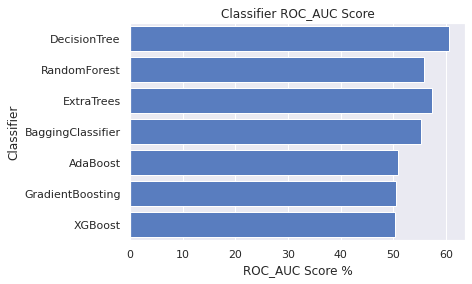

In [ ]:
sns.set_color_codes("muted")
sns.barplot(x='ROC_AUC Score', y='Classifier', data=log_f1, color="b")
plt.xlabel('ROC_AUC Score %')
plt.title('Classifier ROC_AUC Score')
plt.show()

**DT model auc score en iyi görünüyor. Bu sebeple onu tune ederek iyileştirmeye calısacagım**

**DEFAULT LOGİSTİC REGRESSİON**

In [ ]:
model1 = LogisticRegression() # no other hyperparameters to tune
model1.fit(X_train, y_train)
train_score = roc_auc_score(y_train, model1.predict(X_train))
test_score = roc_auc_score(y_test, model1.predict(X_test))
print('Log_Reg train accuracy:', train_score)
print('Log_Reg test accuracy:', test_score)

Log_Reg train accuracy: 0.5097455332958364
Log_Reg test accuracy: 0.5111501014154559


## **TUNİNG THE BEST MODEL**

**TUNING DECISION TREE**

**TUNING RANDOM FOREST**

In [ ]:
param = {"criterion":         ["gini", "entropy"],
              "max_depth":         [6, 7,10,15,20,25,30,40,50,70],
              "max_features":      [1, 2, 3, 4,10,15,30,40],
              "min_samples_split": [2, 3, 4, 5, 6,8,10,15],
              "min_samples_leaf":  [7,10,15,20]
              }

            
scorer = make_scorer(roc_auc_score)


grid_search = RandomizedSearchCV(DecisionTreeClassifier(), param, n_iter =10, cv=9, scoring=scorer)

grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)
print(grid_search.best_score_)

{'min_samples_split': 15, 'min_samples_leaf': 7, 'max_features': 4, 'max_depth': 25, 'criterion': 'entropy'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.5129976086032533


# **TUNING WITH OVERSAMPLING**

In [ ]:
arac_train.Cinsiyet_K = arac_train.Cinsiyet_K.astype('category')
arac_train.age_bin_middle = arac_train.age_bin_middle.astype('category')
arac_train.age_bin_middle_p = arac_train.age_bin_middle_p.astype('category')
arac_train.age_bin_older = arac_train.age_bin_older.astype('category')
arac_train.age_bin_older_p = arac_train.age_bin_older_p.astype('category')
arac_train.Ehliyet_Yok = arac_train.Ehliyet_Yok.astype('category')

arac_train.Sehir_Adana = arac_train.Sehir_Adana.astype('category')
arac_train.Sehir_Adiyaman = arac_train.Sehir_Adiyaman.astype('category')
arac_train.Sehir_Afyon = arac_train.Sehir_Afyon.astype('category')
arac_train.Sehir_Agri = arac_train.Sehir_Agri.astype('category')
arac_train.Sehir_Ankara = arac_train.Sehir_Ankara.astype('category')
arac_train.Sehir_Antalya = arac_train.Sehir_Antalya.astype('category')
arac_train.Sehir_Aydin = arac_train.Sehir_Aydin.astype('category')
arac_train.Sehir_Balikesir = arac_train.Sehir_Balikesir.astype('category')
arac_train.Sehir_Batman = arac_train.Sehir_Batman.astype('category')
arac_train.Sehir_Canakkale = arac_train.Sehir_Canakkale.astype('category')
arac_train.Sehir_Corum = arac_train.Sehir_Corum.astype('category')
arac_train.Sehir_Denizli = arac_train.Sehir_Denizli.astype('category')
arac_train.Sehir_Diyarbakir = arac_train.Sehir_Diyarbakir.astype('category')
arac_train.Sehir_Duzce = arac_train.Sehir_Duzce.astype('category')
arac_train.Sehir_Elazig = arac_train.Sehir_Elazig.astype('category')
arac_train.Sehir_Erzurum = arac_train.Sehir_Erzurum.astype('category')
arac_train.Sehir_Eskisehir = arac_train.Sehir_Eskisehir.astype('category')
arac_train.Sehir_Gaziantep = arac_train.Sehir_Gaziantep.astype('category')
arac_train.Sehir_Giresun = arac_train.Sehir_Giresun.astype('category')
arac_train.Sehir_Hatay = arac_train.Sehir_Hatay.astype('category')
arac_train.Sehir_Isparta = arac_train.Sehir_Isparta.astype('category')
arac_train.Sehir_Istanbul = arac_train.Sehir_Istanbul.astype('category')
arac_train.Sehir_Izmir = arac_train.Sehir_Izmir.astype('category')
arac_train.Sehir_Kastamonu = arac_train.Sehir_Kastamonu.astype('category')
arac_train.Sehir_Kayseri = arac_train.Sehir_Kayseri.astype('category')
arac_train.Sehir_Kocaeli = arac_train.Sehir_Kocaeli.astype('category')
arac_train.Sehir_Konya = arac_train.Sehir_Konya.astype('category')
arac_train.Sehir_Kutahya = arac_train.Sehir_Kutahya.astype('category')
arac_train.Sehir_Malatya = arac_train.Sehir_Malatya.astype('category')
arac_train.Sehir_Mardin = arac_train.Sehir_Mardin.astype('category')
arac_train.Sehir_Mugla = arac_train.Sehir_Mugla.astype('category')
arac_train.Sehir_Mus = arac_train.Sehir_Mus.astype('category')
arac_train.Sehir_Ordu = arac_train.Sehir_Ordu.astype('category')
arac_train.Sehir_Osmaniye = arac_train.Sehir_Osmaniye.astype('category')
arac_train.Sehir_Sakarya = arac_train.Sehir_Sakarya.astype('category')
arac_train.Sehir_Samsun = arac_train.Sehir_Samsun.astype('category')
arac_train.Sehir_Sirnak = arac_train.Sehir_Sirnak.astype('category')
arac_train.Sehir_Sivas = arac_train.Sehir_Sivas.astype('category')
arac_train.Sehir_Tokat = arac_train.Sehir_Tokat.astype('category')
arac_train.Sehir_Trabzon = arac_train.Sehir_Trabzon.astype('category')
arac_train.Sehir_Urfa = arac_train.Sehir_Urfa.astype('category')
arac_train.Sehir_Van = arac_train.Sehir_Van.astype('category')
arac_train.Sehir_Yozgat = arac_train.Sehir_Yozgat.astype('category')
arac_train.Sehir_Zonguldak = arac_train.Sehir_Zonguldak.astype('category')
arac_train.Gecmis_police_Yok = arac_train.Gecmis_police_Yok.astype('category')
arac_train.Arac_yasi_bin = arac_train.Arac_yasi_bin.astype('category')
arac_train.Hasar_durumu_H = arac_train.Hasar_durumu_H.astype('category')
arac_train.Acenta_no_bin_a_1 = arac_train.Acenta_no_bin_a_1.astype('category')
arac_train.Acenta_no_bin_a_2 = arac_train.Acenta_no_bin_a_2.astype('category')
arac_train.Acenta_no_bin_a_4 = arac_train.Acenta_no_bin_a_4.astype('category')
arac_train.Acenta_no_bin_a_5 = arac_train.Acenta_no_bin_a_5.astype('category')


In [ ]:
arac_test.Cinsiyet_K = arac_test.Cinsiyet_K.astype('category')
arac_test.age_bin_middle = arac_test.age_bin_middle.astype('category')
arac_test.age_bin_middle_p = arac_test.age_bin_middle_p.astype('category')
arac_test.age_bin_older = arac_test.age_bin_older.astype('category')
arac_test.age_bin_older_p = arac_test.age_bin_older_p.astype('category')
arac_test.Ehliyet_Yok = arac_test.Ehliyet_Yok.astype('category')
arac_test.Sehir_Adana = arac_test.Sehir_Adana.astype('category')
arac_test.Sehir_Adiyaman = arac_test.Sehir_Adiyaman.astype('category')
arac_test.Sehir_Afyon = arac_test.Sehir_Afyon.astype('category')
arac_test.Sehir_Agri = arac_test.Sehir_Agri.astype('category')
arac_test.Sehir_Ankara = arac_test.Sehir_Ankara.astype('category')
arac_test.Sehir_Antalya = arac_test.Sehir_Antalya.astype('category')
arac_test.Sehir_Aydin = arac_test.Sehir_Aydin.astype('category')
arac_test.Sehir_Balikesir = arac_test.Sehir_Balikesir.astype('category')
arac_test.Sehir_Batman = arac_test.Sehir_Batman.astype('category')
arac_test.Sehir_Canakkale = arac_test.Sehir_Canakkale.astype('category')
arac_test.Sehir_Corum = arac_test.Sehir_Corum.astype('category')
arac_test.Sehir_Denizli = arac_test.Sehir_Denizli.astype('category')
arac_test.Sehir_Diyarbakir = arac_test.Sehir_Diyarbakir.astype('category')
arac_test.Sehir_Duzce = arac_test.Sehir_Duzce.astype('category')
arac_test.Sehir_Elazig = arac_test.Sehir_Elazig.astype('category')
arac_test.Sehir_Erzurum = arac_test.Sehir_Erzurum.astype('category')
arac_test.Sehir_Eskisehir = arac_test.Sehir_Eskisehir.astype('category')
arac_test.Sehir_Gaziantep = arac_test.Sehir_Gaziantep.astype('category')
arac_test.Sehir_Giresun = arac_test.Sehir_Giresun.astype('category')
arac_test.Sehir_Hatay = arac_test.Sehir_Hatay.astype('category')
arac_test.Sehir_Isparta = arac_test.Sehir_Isparta.astype('category')
arac_test.Sehir_Istanbul = arac_test.Sehir_Istanbul.astype('category')
arac_test.Sehir_Izmir = arac_test.Sehir_Izmir.astype('category')
arac_test.Sehir_Kastamonu = arac_test.Sehir_Kastamonu.astype('category')
arac_test.Sehir_Kayseri = arac_test.Sehir_Kayseri.astype('category')
arac_test.Sehir_Kocaeli = arac_test.Sehir_Kocaeli.astype('category')
arac_test.Sehir_Konya = arac_test.Sehir_Konya.astype('category')
arac_test.Sehir_Kutahya = arac_test.Sehir_Kutahya.astype('category')
arac_test.Sehir_Malatya = arac_test.Sehir_Malatya.astype('category')
arac_test.Sehir_Mardin = arac_test.Sehir_Mardin.astype('category')
arac_test.Sehir_Mugla = arac_test.Sehir_Mugla.astype('category')
arac_test.Sehir_Mus = arac_test.Sehir_Mus.astype('category')
arac_test.Sehir_Ordu = arac_test.Sehir_Ordu.astype('category')
arac_test.Sehir_Osmaniye = arac_test.Sehir_Osmaniye.astype('category')
arac_test.Sehir_Sakarya = arac_test.Sehir_Sakarya.astype('category')
arac_test.Sehir_Samsun = arac_test.Sehir_Samsun.astype('category')
arac_test.Sehir_Sirnak = arac_test.Sehir_Sirnak.astype('category')
arac_test.Sehir_Sivas = arac_test.Sehir_Sivas.astype('category')
arac_test.Sehir_Tokat = arac_test.Sehir_Tokat.astype('category')
arac_test.Sehir_Trabzon = arac_test.Sehir_Trabzon.astype('category')
arac_test.Sehir_Urfa = arac_test.Sehir_Urfa.astype('category')
arac_test.Sehir_Van = arac_test.Sehir_Van.astype('category')
arac_test.Sehir_Yozgat = arac_test.Sehir_Yozgat.astype('category')
arac_test.Sehir_Zonguldak = arac_test.Sehir_Zonguldak.astype('category')
arac_test.Gecmis_police_Yok = arac_test.Gecmis_police_Yok.astype('category')
arac_test.Arac_yasi_bin = arac_test.Arac_yasi_bin.astype('category')
arac_test.Hasar_durumu_H = arac_test.Hasar_durumu_H.astype('category')
arac_test.Acenta_no_bin_a_1 = arac_test.Acenta_no_bin_a_1.astype('category')
arac_test.Acenta_no_bin_a_2 = arac_test.Acenta_no_bin_a_2.astype('category')
arac_test.Acenta_no_bin_a_4 = arac_test.Acenta_no_bin_a_4.astype('category')
arac_test.Acenta_no_bin_a_5 = arac_test.Acenta_no_bin_a_5.astype('category')





In [ ]:
sampledata= arac_train.sample(frac =.25)

In [ ]:
y = sampledata.Sonuc
X = sampledata.drop('Sonuc', axis=1) #drop column "Price" from the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
seed = 42

In [ ]:
# define the transformer for numerical variables
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])

# list of numerical features in the data set
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

# define the preprocessor to scale numerical variables and leave categorical ones untouched
preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # let anything non-numerical pass through

# **RANDOM OVER SAMPLING With DT**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomOverSampler(random_state=seed)),
                       ('df'    , DecisionTreeClassifier(random_state=seed))])


params = {"df__criterion":         ["gini", "entropy"],
          "df__max_depth":         [6, 7,10,15],
           "df__max_features":      [1, 2, 3, 4],
           "df__min_samples_split": [2, 3, 4, 5],
           "df__min_samples_leaf":  [7,10,15]
              }



scorer = make_scorer(roc_auc_score)

grid1 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid1.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')
print(grid1.best_params_)
print(grid1.best_estimator_)
print(grid1.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.7s


Best grid parameters: {'df__min_samples_split': 2, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 7, 'df__criterion': 'gini'} 

{'df__min_samples_split': 2, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 7, 'df__criterion': 'gini'}
Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  w

[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   41.4s finished


In [ ]:
print('Train auc:', grid1.score(X_train, y_train))
print('Test auc :', grid1.score(X_test, y_test))

Train auc: 0.787780776020734
Test auc : 0.7827919161321824


# **SMOTE with DT**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', SMOTE(random_state=seed)),
                       ('df'    , DecisionTreeClassifier(random_state=seed))])


params = {"df__criterion":         ["gini", "entropy"],
          "df__max_depth":         [6, 7,10,15],
           "df__max_features":      [1, 2, 3, 4],
           "df__min_samples_split": [2, 3, 4, 5],
           "df__min_samples_leaf":  [7,10,15]
              }



scorer = make_scorer(roc_auc_score)

grid1 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid1.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')
print(grid1.best_params_)
print(grid1.best_estimator_)
print(grid1.best_score_)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.8min finished


Best grid parameters: {'df__min_samples_split': 4, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 15, 'df__criterion': 'gini'} 

{'df__min_samples_split': 4, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 15, 'df__criterion': 'gini'}
Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                 

In [ ]:
print('Train auc:', grid1.score(X_train, y_train))
print('Test auc :', grid1.score(X_test, y_test))

Train auc: 0.7685114317552563
Test auc : 0.7688898873435064


# **RandomUnderSampler With DT**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomUnderSampler(random_state=seed)),
                       ('df'    , DecisionTreeClassifier(random_state=seed))])


params = {"df__criterion":         ["gini", "entropy"],
          "df__max_depth":         [6, 7,10,15],
           "df__max_features":      [1, 2, 3, 4],
           "df__min_samples_split": [2, 3, 4, 5],
           "df__min_samples_leaf":  [7,10,15]
              }



scorer = make_scorer(roc_auc_score)

grid3 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid3.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')
print(grid3.best_params_)
print(grid3.best_estimator_)
print(grid3.best_score_)

print('Train auc:', grid3.score(X_train, y_train))
print('Test auc :', grid3.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   32.1s finished


Best grid parameters: {'df__min_samples_split': 4, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 15, 'df__criterion': 'gini'} 

{'df__min_samples_split': 2, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 15, 'df__criterion': 'entropy'}
Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                              

# **SVM**

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomUnderSampler(random_state=seed)),
                       ('classifier',SVC(random_state=seed))])


params = [
          {'classifier__kernel': ['rbf'], 
           'classifier__gamma' : ['auto'], 
           'classifier__C'     : [5],
           'classifier__class_weight': [{0:0.5,1:1}, 'balanced']}
         ]



scorer = make_scorer(roc_auc_score)

grid4 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid4.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')
print(grid4.best_params_)
print(grid4.best_estimator_)
print(grid4.best_score_)

print('Train auc:', grid4.score(X_train, y_train))
print('Test auc :', grid4.score(X_test, y_test))

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    8.8s finished


Best grid parameters: {'df__min_samples_split': 4, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 15, 'df__criterion': 'gini'} 

{'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__class_weight': 'balanced', 'classifier__C': 5}
Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_s

# **FEATURE SELECTION**

In [ ]:
Clf = RF(criterion = 'gini', n_estimators = 150, max_depth = 23, min_samples_leaf = 1, 
         min_samples_split = 2, max_features = 4, class_weight='balanced', random_state = seed)
Clf.fit(X_train, y_train)
print( 'RF Training accuracy :', Clf.score(X_train, y_train) )
print( 'RF Test accuracy     :', Clf.score(X_test, y_test) ,"\n")

RF Training accuracy : 0.9181990707414436
RF Test accuracy     : 0.8176285826462505 



Feature ranking:
 1.   Arac_yasi_bin 55 (0.210300)
 2. Sehir_Zonguldak 53 (0.194270)
 3.             Yas  0 (0.124796)
 4.     Yillik_prim  1 (0.104655)
 5.            Sure  2 (0.103534)
 6. Gecmis_police_Yok 54 (0.053038)
 7. Acenta_no_bin_a_4 59 (0.033867)
 8.   Sehir_Isparta 30 (0.017768)
 9. Acenta_no_bin_a_2 58 (0.015306)
10.  age_bin_middle  5 (0.014338)
11.           Sonuc  3 (0.013247)
12.      Cinsiyet_K  4 (0.013200)
13. Acenta_no_bin_a_1 57 (0.012941)
14.   age_bin_older  7 (0.007564)
15. age_bin_middle_p  6 (0.006147)
16.      Sehir_Agri 13 (0.005688)
17.  Sehir_Istanbul 31 (0.004362)
18.   Sehir_Kayseri 34 (0.004134)
19. Sehir_Eskisehir 26 (0.004041)
20.   Sehir_Kocaeli 35 (0.002755)
21.     Ehliyet_Yok  9 (0.002711)
22.    Sehir_Ankara 14 (0.002662)
23.   Sehir_Trabzon 49 (0.002587)
24.     Sehir_Aydin 16 (0.002449)
25. Sehir_Kastamonu 33 (0.002448)
26.   Sehir_Denizli 21 (0.002344)
27.   Sehir_Antalya 15 (0.002146)
28.     Sehir_Adana 10 (0.002077)
29.   Sehir_Sakarya 44

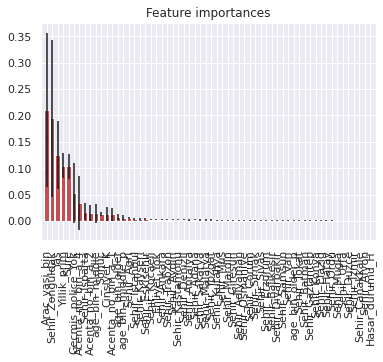

In [ ]:
importances = Clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in Clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = arac_train.columns.tolist()
# Print the feature ranking
print("Feature ranking:")
feature_list = []
for f in range(X.shape[1]):
#    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    feature_list.append(feature_names[indices[f]])
    print("%2d. %15s %2d (%f)" % (f + 1, feature_names[indices[f]], indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")

#plt.xticks(range(X.shape[1]), indices, rotation='vertical')
plt.xticks(range(X.shape[1]), feature_list, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
used_columns=["Arac_yasi_bin","Sehir_Zonguldak","Yas","Yillik_prim","Sure","Gecmis_police_Yok","Acenta_no_bin_a_4" ,"Sehir_Isparta",
              "Acenta_no_bin_a_2","age_bin_middle" ,"Sonuc","Cinsiyet_K","Acenta_no_bin_a_1","age_bin_older","age_bin_middle_p","Sehir_Agri",
              "Sehir_Istanbul","Sehir_Kayseri","Sehir_Eskisehir","Sehir_Kocaeli","Ehliyet_Yok","Sehir_Ankara","Sehir_Trabzon","Sehir_Aydin",
              "Sehir_Kastamonu","Sehir_Denizli","Sehir_Antalya","Sehir_Adana","Sehir_Sakarya"]

NEW_DF=arac_train[used_columns]

In [ ]:
sampledata= NEW_DF.sample(frac =.25)

In [ ]:
y = sampledata.Sonuc
X = sampledata.drop('Sonuc', axis=1) #drop column "Price" from the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
seed = 42

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomUnderSampler(random_state=seed)),
                       ('classifier',SVC(random_state=seed))])


params = [
          {'classifier__kernel': ['rbf'], 
           'classifier__gamma' : ['auto'], 
           'classifier__C'     : [5],
           'classifier__class_weight': [{0:0.5,1:1}, 'balanced']}
         ]



scorer = make_scorer(roc_auc_score)

grid4 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid4.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')
print(grid4.best_params_)
print(grid4.best_estimator_)
print(grid4.best_score_)

print('Train auc:', grid4.score(X_train, y_train))
print('Test auc :', grid4.score(X_test, y_test))

Fitting 4 folds for each of 2 candidates, totalling 8 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:   37.5s finished


Best grid parameters: {'df__min_samples_split': 4, 'df__min_samples_leaf': 10, 'df__max_features': 1, 'df__max_depth': 15, 'df__criterion': 'gini'} 

{'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__class_weight': 'balanced', 'classifier__C': 5}
Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_s

# **MLP**

In [ ]:
pipeline = Pipeline(steps=[('classifier',   MLPClassifier(max_iter=50, random_state=seed))])


params = {'classifier__hidden_layer_sizes': [(50,50), (100,100)],
          'classifier__activation': ['tanh', 'relu'],
          'classifier__solver': ['adam', 'sgd'],
          'classifier__alpha': [0.01, 0.1, 1],
          'classifier__learning_rate': ['constant', 'adaptive', 'invscaling']
         }



scorer = make_scorer(roc_auc_score)

grid5 = RandomizedSearchCV(pipeline, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid5.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 24.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 25.3min finished


RandomizedSearchCV(cv=4, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('classifier',
                                              MLPClassifier(activation='relu',
                                                            alpha=0.0001,
                                                            batch_size='auto',
                                                            beta_1=0.9,
                                                            beta_2=0.999,
                                                            early_stopping=False,
                                                            epsilon=1e-08,
                                                            hidden_layer_sizes=(100,),
                                                            learning_rate='constant',
                                                            learning_rate_init=0.001,
                                                     

In [ ]:
print('Best grid parameters:', grid5.best_params_, '\n')
print('Best grid estimator:',grid5.best_estimator_)
print('Best grid score_:',grid5.best_score_)

print('Train auc:', grid5.score(X_train, y_train))
print('Test auc :', grid5.score(X_test, y_test))

Best grid parameters: {'classifier__solver': 'adam', 'classifier__learning_rate': 'constant', 'classifier__hidden_layer_sizes': (50, 50), 'classifier__alpha': 0.01, 'classifier__activation': 'relu'} 

Best grid estimator: Pipeline(memory=None,
         steps=[('classifier',
                 MLPClassifier(activation='relu', alpha=0.01, batch_size='auto',
                               beta_1=0.9, beta_2=0.999, early_stopping=False,
                               epsilon=1e-08, hidden_layer_sizes=(50, 50),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=50, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=42, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
 

# **FULL DATA PREDICTION**

In [ ]:
y = arac_train.Sonuc
X = arac_train.drop('Sonuc', axis=1) #drop column "Price" from the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
seed = 42

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomOverSampler(random_state=seed)),
                       ('df'    , DecisionTreeClassifier(random_state=seed))])


params = {"df__criterion":         ["gini", "entropy"],
          "df__max_depth":         [10,15,18,20,22],
           "df__max_features":      [1, 2, 3, 4],
           "df__min_samples_split": [2, 3, 4, 5],
           "df__min_samples_leaf":  [3,5,6,7,10]
              }

scorer = make_scorer(roc_auc_score)

grid1 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid1.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')
print('Best grid estimator:',grid1.best_estimator_)
print('Best grid score_:',grid1.best_score_)

print('Train auc:', grid1.score(X_train, y_train))
print('Test auc :', grid1.score(X_test, y_test))

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.7min finished


Best grid parameters: {'df__min_samples_split': 2, 'df__min_samples_leaf': 3, 'df__max_features': 1, 'df__max_depth': 15, 'df__criterion': 'gini'} 

Best grid estimator: Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
            

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomUnderSampler(random_state=seed)),
                       ('classifier',SVC(random_state=seed))])


params = [
          {'classifier__kernel': ['rbf'], 
           'classifier__gamma' : ['auto'], 
           'classifier__C'     : [5],
           'classifier__class_weight': [{0:0.5,1:1}, 'balanced']}
         ]



scorer = make_scorer(roc_auc_score)

grid4 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid4.fit(X_train, y_train)
print('Best grid parameters:', grid1.best_params_, '\n')
print(grid4.best_params_)
print(grid4.best_estimator_)
print(grid4.best_score_)

print('Train auc:', grid4.score(X_train, y_train))
print('Test auc :', grid4.score(X_test, y_test))

In [ ]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())
                                 ])
num_attrs = X_train.columns[X_train.dtypes != 'category'].tolist()

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_attrs)],
                                 remainder = 'passthrough') # process num features and let all others pass through

ovsmp_pipe = pipe_imb([('preprocessor' , preprocessor),
                       ('sampler', RandomOverSampler(random_state=seed)),
                       ('clf'    , LogisticRegression(random_state=seed))])


params = [{'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l1'], 
           'clf__solver'      : ['liblinear', 'saga'],
           'clf__class_weight': ['balanced']},
          
          {'sampler__sampling_strategy': [0.6, 0.7],
           'clf__C'           : np.arange(0.1, 2.0), 
           'clf__penalty'     : ['l2'], 
           'clf__solver'      : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
           'clf__class_weight': ['balanced']},
         ]

scorer = make_scorer(roc_auc_score)

grid3 = RandomizedSearchCV(ovsmp_pipe, param_distributions=params, cv=4,scoring=scorer, n_jobs=-1,n_iter=50,verbose=1)

grid3.fit(X_train, y_train)
print('Best grid parameters:', grid3.best_params_, '\n')
print('Best grid estimator:',grid3.best_estimator_)
print('Best grid score_:',grid3.best_score_)

print('Train auc:', grid3.score(X_train, y_train))
print('Test auc :', grid3.score(X_test, y_test))

# **PREDİCTİON FOR TEST**

In [ ]:
y_pred = grid1.predict(arac_test)
arac_test_2 = pd.read_excel('Arac_test.xlsx')

In [ ]:
submission_cıgdem = pd.DataFrame({"ID": np.arange(1,63673).tolist(), "Prediction":y_pred})

In [ ]:
submission_cıgdem.to_csv("CigdemUyumaz.csv", index = None)